In [ ]:
!pip install psycopg2-binary sqlalchemy

In [ ]:
from sqlalchemy import create_engine
import pandas as pd

In [ ]:
# Steps to Configure SQLAlchemy Connection:

# Navigate to the Connect option in your interface.
# Select SQLAlchemy as the connection type.
# Copy the connection string from the session pooler section of your .env file.
# Enter your project password (not the supabase login password)  in the password field.

# Note: Ensure your .env file is securely stored and never shared publicly.


# Database Configuration (PostgreSQL via Supabase)
user='your_supabase_user_here'  # Pre-filled when copied from Supabase
password='your_project_password_here'  # Enter your Supabase project password
host='your_supabase_host_here'  # Pre-filled when copied from Supabase
port=5432  # Default PostgreSQL port
dbname='postgres'  # Default database name

In [ ]:
connection_string = f"postgresql://{user}:{password}@{host}:{port}/{dbname}"
engine = create_engine(connection_string)

In [ ]:
query = '''
    SELECT * FROM sales
'''

df = pd.read_sql(query, engine)
df

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Return Status,formated_order_date
0,19227,High,0.10,6.48,5.86,377,Sylvia Bush,Express Air,Consumer,Office Supplies,...,Batavia,60510,41046,41047,-78.02,16,105.69,89580,Not Returned,2012-05-17
1,22859,Medium,0.07,40.99,17.48,931,Norma Hull,Regular Air,Small Business,Office Supplies,...,Paterson,7501,41474,41475,21.58,4,162.88,87145,Not Returned,2013-07-19
2,24973,Medium,0.03,6.48,6.60,1119,Cecil Berger,Express Air,Consumer,Office Supplies,...,Bella Vista,72714,41151,41152,-31.58,19,132.70,86776,Not Returned,2012-08-30
3,21078,Low,0.10,6.48,7.37,1347,Vivian Goldstein,Regular Air,Home Office,Office Supplies,...,Brandon,33511,41342,41344,-313.45,10,64.78,89691,Not Returned,2013-03-09
4,25418,High,0.00,5.98,5.46,1495,Theodore Petty,Regular Air,Home Office,Office Supplies,...,Kalispell,59901,41049,41051,-32.62,6,37.93,85886,Not Returned,2012-05-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9421,20275,Critical,0.06,35.89,14.72,3402,Frederick Cole,Regular Air,Consumer,Office Supplies,...,Charleston,25314,41408,41409,137.86,13,447.87,87532,Not Returned,2013-05-14
9422,20276,Critical,0.00,3.34,7.49,3402,Frederick Cole,Regular Air,Consumer,Office Supplies,...,Charleston,25314,41408,41408,-39.07,3,13.23,87532,Not Returned,2013-05-14
9423,24491,Not Specified,0.08,550.98,45.70,3402,Frederick Cole,Delivery Truck,Consumer,Furniture,...,Charleston,25314,41529,41531,-1225.03,4,2215.93,87533,Not Returned,2013-09-12
9424,25914,High,0.10,105.98,13.99,3403,Tammy Buckley,Express Air,Consumer,Furniture,...,Cheyenne,82001,40217,40220,349.49,5,506.50,87530,Not Returned,2010-02-08


In [ ]:
# 📊 Load RFM raw scores for each customer
query = '''
SELECT * FROM rfm_score_data
'''
df_rfm_scores = pd.read_sql(query, engine)
df_rfm_scores.head()


,Customer ID,Customer Name,recency_value,frequency_value,monetary_value,r_score,f_score,m_score,total_rfm_score,rfm_score_combination
0,783,Carlos Byrd,1455,1,615.0,1,2,4,7,124
1,2165,Melanie Knight,1452,1,16.0,1,1,5,7,115
2,470,Tony Doyle,1450,1,60.0,1,1,5,7,115
3,469,Marion Bowling,1450,1,33.0,1,2,5,8,125
4,466,Marc Nash,1450,1,1133.0,1,1,3,5,113


In [ ]:
# 🧠 Load RFM-segmented customer list with segment labels
query = '''
SELECT * FROM rfm_analysis
'''
df_segments = pd.read_sql(query, engine)
df_segments.head()


,Customer ID,Customer Name,recency_value,frequency_value,monetary_value,r_score,f_score,m_score,total_rfm_score,rfm_score_combination,customer_segment
0,783,Carlos Byrd,1455,1,615.0,1,2,4,7,124,Other
1,2165,Melanie Knight,1452,1,16.0,1,1,5,7,115,Other
2,470,Tony Doyle,1450,1,60.0,1,1,5,7,115,Other
3,469,Marion Bowling,1450,1,33.0,1,2,5,8,125,Other
4,466,Marc Nash,1450,1,1133.0,1,1,3,5,113,Other


In [ ]:
# 📈 How many customers are in each segment?
query = '''
SELECT customer_segment, COUNT(*) AS number_of_customers
FROM rfm_analysis
GROUP BY customer_segment
ORDER BY number_of_customers DESC
'''
df_segment_counts = pd.read_sql(query, engine)
df_segment_counts


,customer_segment,number_of_customers
0,Other,1058
1,Promising Customers,728
2,Frequent But Low Spenders,401
3,Potential Loyalists,234
4,At Risk,86
5,Loyal Customers,62
6,Recent Customers,54
7,New Champions,52
8,About to Lose,16
9,Potential Promising Customers,7


In [ ]:
# 💰 Average monetary value per customer segment
query = '''
SELECT customer_segment, ROUND(AVG(monetary_value)) AS avg_monetary_value
FROM rfm_analysis
GROUP BY customer_segment
ORDER BY avg_monetary_value DESC
'''
df_segment_avg = pd.read_sql(query, engine)
df_segment_avg


,customer_segment,avg_monetary_value
0,Frequent But Low Spenders,13419.0
1,About to Lose,9217.0
2,Recent Customers,6386.0
3,At Risk,4998.0
4,Potential Promising Customers,3246.0
5,Promising Customers,2073.0
6,Potential Loyalists,1159.0
7,New Champions,847.0
8,Other,729.0
9,Loyal Customers,455.0


In [ ]:
# 🏆 Top 10 "Champion Customers" by total monetary value
query = '''
SELECT *
FROM rfm_analysis
WHERE customer_segment = 'Champion Customers'
ORDER BY monetary_value DESC
LIMIT 10
'''
df_top_champions = pd.read_sql(query, engine)
df_top_champions


,Customer ID,Customer Name,recency_value,frequency_value,monetary_value,r_score,f_score,m_score,total_rfm_score,rfm_score_combination,customer_segment
0,1654,Bob Jiang,16,4,118.0,5,5,5,15,555,Champion Customers


In [ ]:
# 🔍 Recently active customers (recency_value = 0 is most recent)
query = '''
SELECT *
FROM rfm_analysis
ORDER BY recency_value ASC
LIMIT 10
'''
df_recent_customers = pd.read_sql(query, engine)
df_recent_customers


,Customer ID,Customer Name,recency_value,frequency_value,monetary_value,r_score,f_score,m_score,total_rfm_score,rfm_score_combination,customer_segment
0,1090,Seth Davies,0,5,4410.0,5,5,1,11,551,Frequent But Low Spenders
1,2277,Allison Peacock,0,2,401.0,5,3,4,12,534,New Champions
2,3187,Sidney Gilliam,1,5,729.0,5,5,3,13,553,Potential Loyalists
3,3265,Glenn Morgan,1,3,817.0,5,4,3,12,543,Potential Loyalists
4,2149,Rodney Proctor,1,3,1599.0,5,4,3,12,543,Potential Loyalists
5,1672,Sidney Scarborough,1,4,3611.0,5,4,2,11,542,Promising Customers
6,2218,Hilda Fletcher,1,3,255.0,5,3,4,12,534,New Champions
7,196,Holly Chu,2,2,270.0,5,3,4,12,534,New Champions
8,3022,Patsy Langley,2,3,2777.0,5,4,2,11,542,Promising Customers
9,2090,Glenda Dougherty,2,2,6530.0,5,2,1,8,521,Recent Customers


In [ ]:
# 🔄 Frequent but low-value customers
query = '''
SELECT *
FROM rfm_analysis
WHERE f_score >= 4 AND m_score <= 2
ORDER BY frequency_value DESC
LIMIT 10
'''
df_frequent_low_spend = pd.read_sql(query, engine)
df_frequent_low_spend


,Customer ID,Customer Name,recency_value,frequency_value,monetary_value,r_score,f_score,m_score,total_rfm_score,rfm_score_combination,customer_segment
0,1193,Louis Parrish,128,17,32893.0,4,5,1,10,451,Frequent But Low Spenders
1,2882,Andrew Gonzalez,135,16,33908.0,4,5,1,10,451,Frequent But Low Spenders
2,699,Jenny Gold,18,15,43230.0,5,5,1,11,551,Frequent But Low Spenders
3,2491,Sean N Boyer,108,15,55242.0,4,5,1,10,451,Frequent But Low Spenders
4,308,Glen Caldwell,63,15,89270.0,5,5,1,11,551,Frequent But Low Spenders
5,1745,Herbert Holden,13,14,38106.0,5,5,1,11,551,Frequent But Low Spenders
6,1106,Maxine Collier Grady,73,13,34935.0,5,5,1,11,551,Frequent But Low Spenders
7,1129,Pam Patton,324,13,23083.0,3,5,1,9,351,Frequent But Low Spenders
8,3079,Andrew Levine,45,13,43756.0,5,5,1,11,551,Frequent But Low Spenders
9,272,Eleanor Swain,26,13,34482.0,5,5,1,11,551,Frequent But Low Spenders


In [ ]:
# ⚠️ At Risk or Lost Customers for re-engagement strategy
query = '''
SELECT *
FROM rfm_analysis
WHERE customer_segment IN ('At Risk', 'Lost Customers', 'About to Lose')
ORDER BY recency_value DESC
'''
df_risk_customers = pd.read_sql(query, engine)
df_risk_customers


,Customer ID,Customer Name,recency_value,frequency_value,monetary_value,r_score,f_score,m_score,total_rfm_score,rfm_score_combination,customer_segment
0,2776,April Henson,1449,1,3916.0,1,2,2,5,122,At Risk
1,366,Patrick Rosenthal,1444,1,1968.0,1,1,2,4,112,At Risk
2,2775,Theodore Rubin,1431,1,4146.0,1,2,2,5,122,At Risk
3,596,Doris Fitzpatrick,1415,1,4974.0,1,1,1,3,111,At Risk
4,2345,Colleen Marsh,1388,1,2117.0,1,2,2,5,122,At Risk
...,...,...,...,...,...,...,...,...,...,...,...
97,2332,Marguerite Norton,251,2,16775.0,3,2,1,6,321,About to Lose
98,2869,Terri Hanson,237,2,5299.0,3,2,1,6,321,About to Lose
99,1082,Joy Park,226,2,5404.0,3,2,1,6,321,About to Lose
100,794,Vincent Kenney,224,1,15504.0,3,2,1,6,321,About to Lose


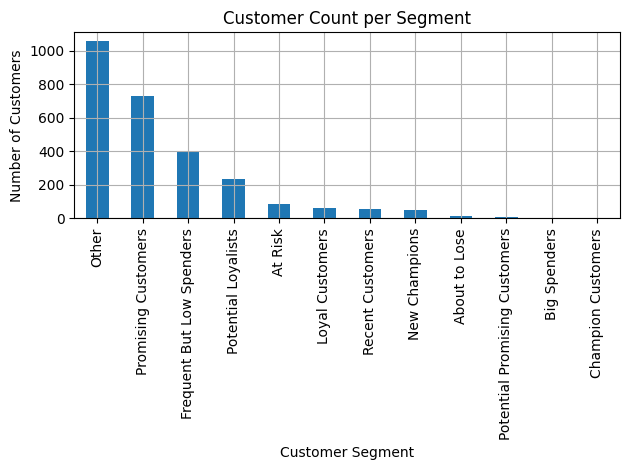

In [ ]:
# 📊 Plot customer segment distribution
import matplotlib.pyplot as plt

df_segment_counts.plot(kind='bar', x='customer_segment', y='number_of_customers', legend=False)
plt.title("Customer Count per Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Number of Customers")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# 📦 Required imports for analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Supabase SQL connection already set up (you said you're using `engine`)


/tmp/ipython-input-5-622637056.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_segment_counts, x='customer_segment', y='number_of_customers', palette='viridis')


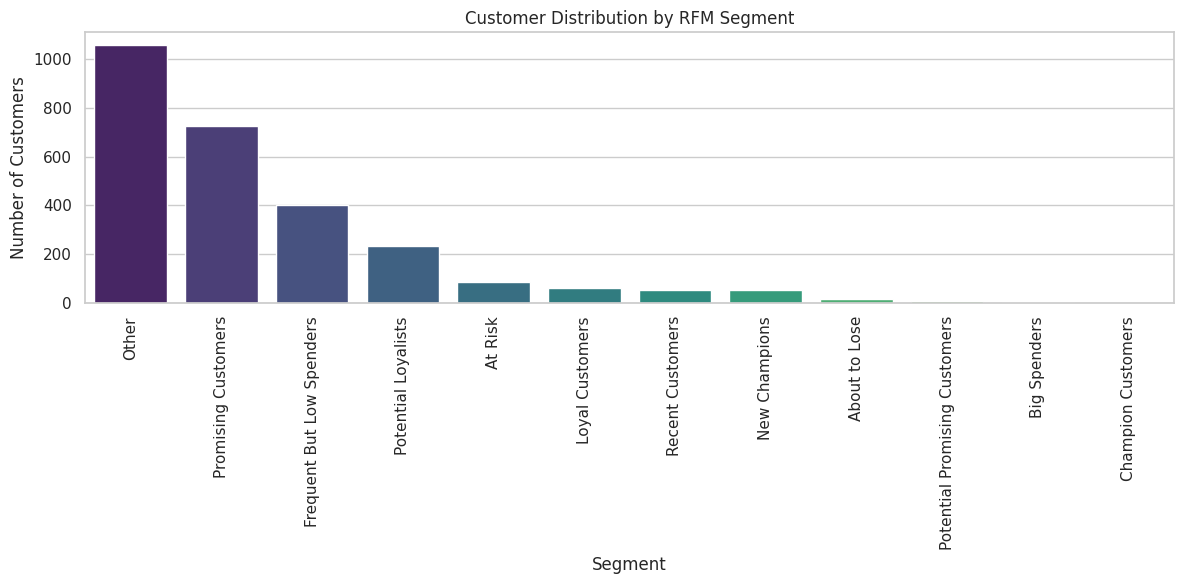

In [ ]:
# 📊 Customer count by segment — who are your largest customer groups?
query = '''
SELECT customer_segment, COUNT(*) AS number_of_customers
FROM rfm_analysis
GROUP BY customer_segment
ORDER BY number_of_customers DESC
'''
df_segment_counts = pd.read_sql(query, engine)

# 📈 Bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=df_segment_counts, x='customer_segment', y='number_of_customers', palette='viridis')
plt.title('Customer Distribution by RFM Segment')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


/tmp/ipython-input-6-1703078299.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_segment_value, x='customer_segment', y='avg_monetary_value', palette='magma')


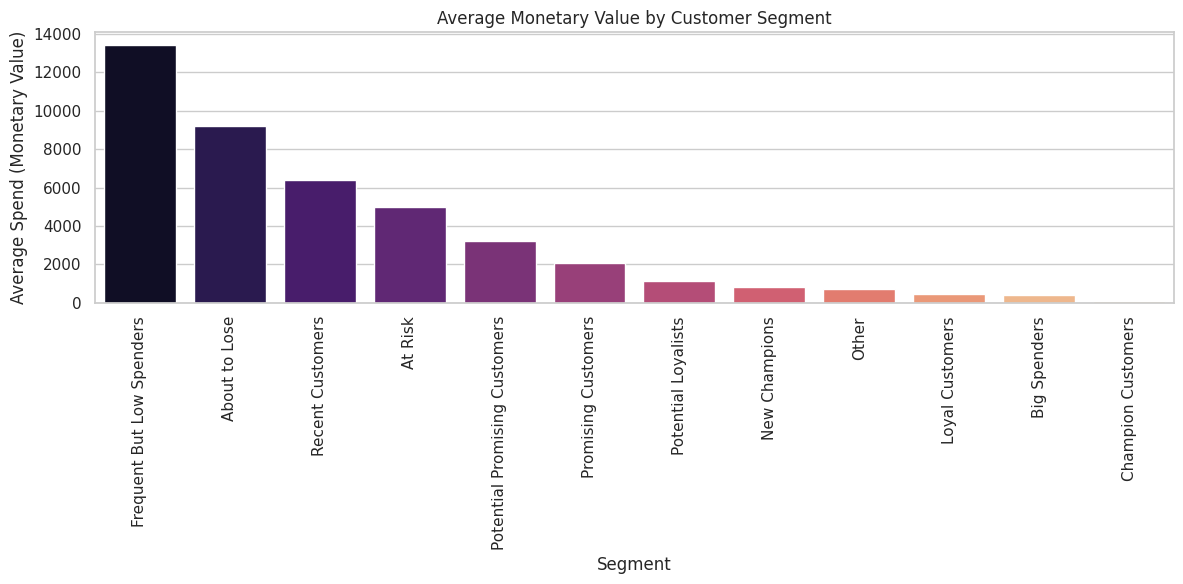

In [ ]:
# 💸 Average spend per customer in each segment
query = '''
SELECT customer_segment, ROUND(AVG(monetary_value)) AS avg_monetary_value
FROM rfm_analysis
GROUP BY customer_segment
ORDER BY avg_monetary_value DESC
'''
df_segment_value = pd.read_sql(query, engine)

# 📈 Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_segment_value, x='customer_segment', y='avg_monetary_value', palette='magma')
plt.title('Average Monetary Value by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Average Spend (Monetary Value)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


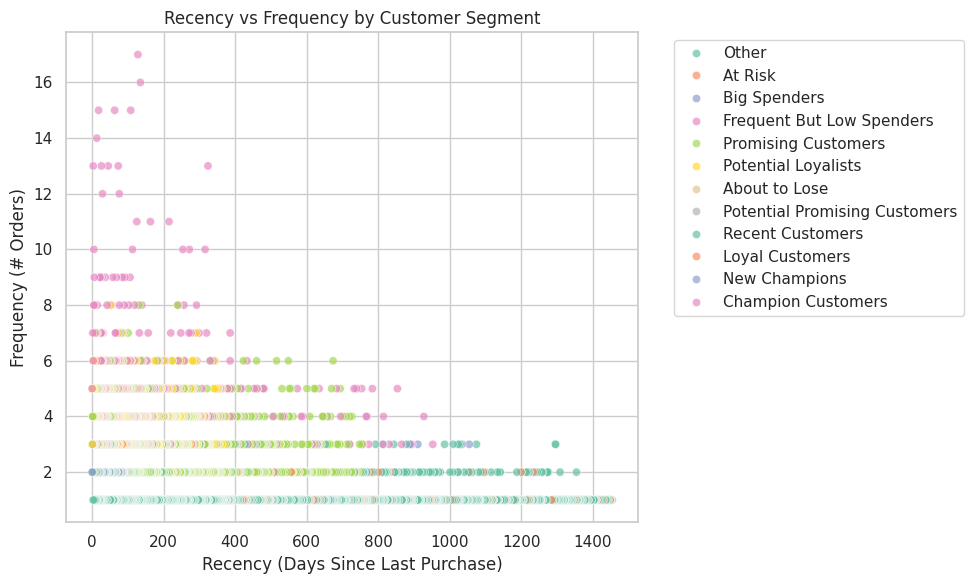

In [ ]:
# 📉 Explore customer behavior distribution
query = '''
SELECT customer_segment, recency_value, frequency_value
FROM rfm_analysis
'''
df_rf = pd.read_sql(query, engine)

# 🟢 Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_rf, x='recency_value', y='frequency_value', hue='customer_segment', palette='Set2', alpha=0.7)
plt.title('Recency vs Frequency by Customer Segment')
plt.xlabel('Recency (Days Since Last Purchase)')
plt.ylabel('Frequency (# Orders)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/tmp/ipython-input-7-179503296.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_m, x='customer_segment', y='monetary_value', palette='coolwarm')


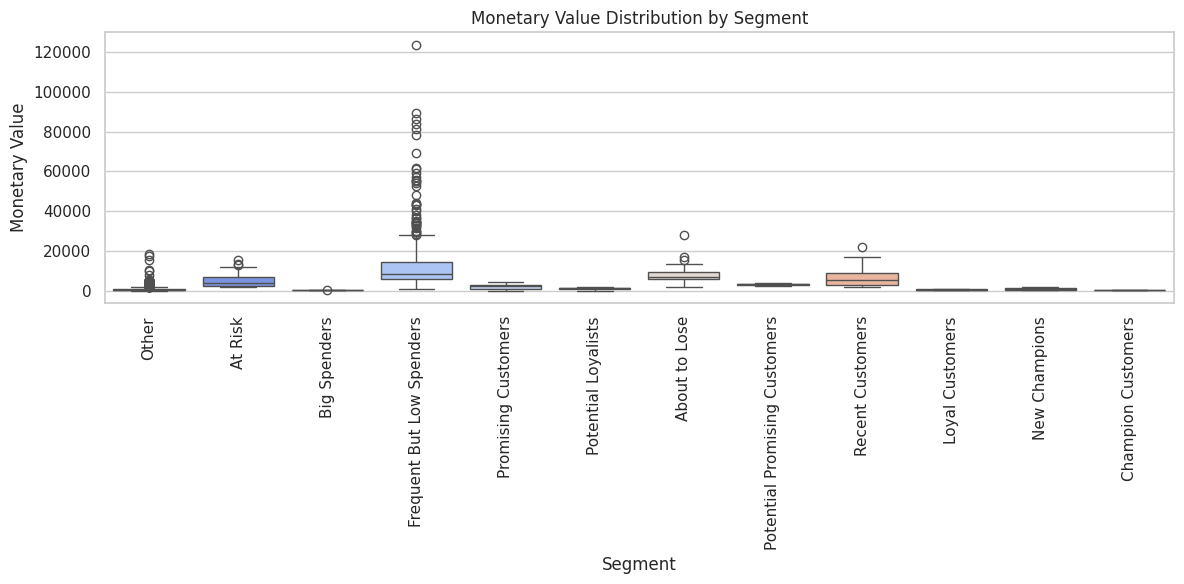

In [ ]:
# 📦 Show how customer spend varies within segments
query = '''
SELECT customer_segment, monetary_value
FROM rfm_analysis
'''
df_m = pd.read_sql(query, engine)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_m, x='customer_segment', y='monetary_value', palette='coolwarm')
plt.title('Monetary Value Distribution by Segment')
plt.xlabel('Segment')
plt.ylabel('Monetary Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


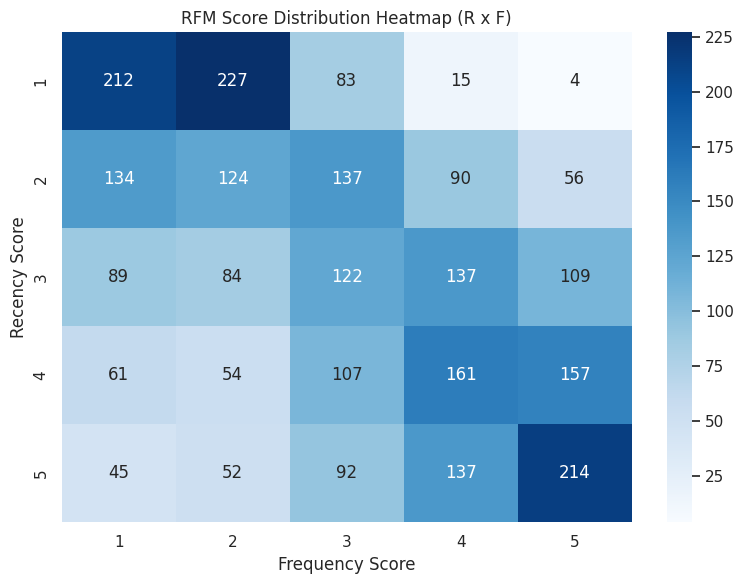

In [ ]:
# 🔥 What are the most common RFM score combos?
query = '''
SELECT rfm_score_combination, COUNT(*) AS count
FROM rfm_score_data
GROUP BY rfm_score_combination
ORDER BY rfm_score_combination
'''
df_combo = pd.read_sql(query, engine)

# Prepare pivot table
df_combo['R'] = df_combo['rfm_score_combination'].str[0].astype(int)
df_combo['F'] = df_combo['rfm_score_combination'].str[1].astype(int)
df_combo['M'] = df_combo['rfm_score_combination'].str[2].astype(int)
pivot = df_combo.pivot_table(index='R', columns='F', values='count', aggfunc='sum').fillna(0)

# 🗺️ Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='Blues')
plt.title('RFM Score Distribution Heatmap (R x F)')
plt.xlabel('Frequency Score')
plt.ylabel('Recency Score')
plt.tight_layout()
plt.show()


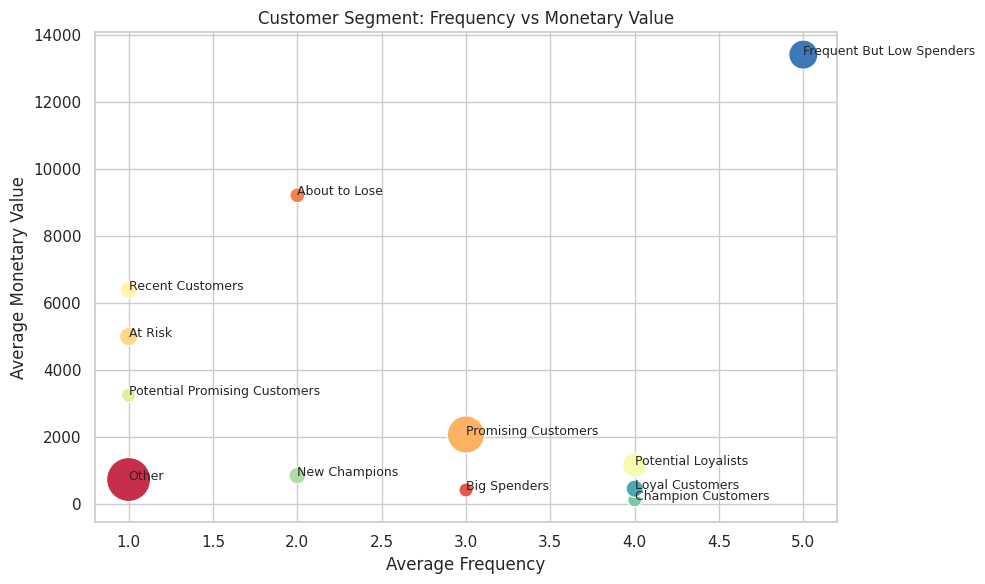

In [ ]:
# 🫧 Visualize segment engagement by frequency and spend
query = '''
SELECT customer_segment, ROUND(AVG(frequency_value)) AS avg_freq, ROUND(AVG(monetary_value)) AS avg_monetary, COUNT(*) AS customer_count
FROM rfm_analysis
GROUP BY customer_segment
'''
df_bubble = pd.read_sql(query, engine)

# 🫧 Bubble Chart
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_bubble, x='avg_freq', y='avg_monetary', size='customer_count', hue='customer_segment', palette='Spectral', sizes=(100, 1000), legend=False)
for i in range(len(df_bubble)):
    plt.text(df_bubble['avg_freq'][i], df_bubble['avg_monetary'][i], df_bubble['customer_segment'][i], fontsize=9)

plt.title('Customer Segment: Frequency vs Monetary Value')
plt.xlabel('Average Frequency')
plt.ylabel('Average Monetary Value')
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-8-3382926422.py:35: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


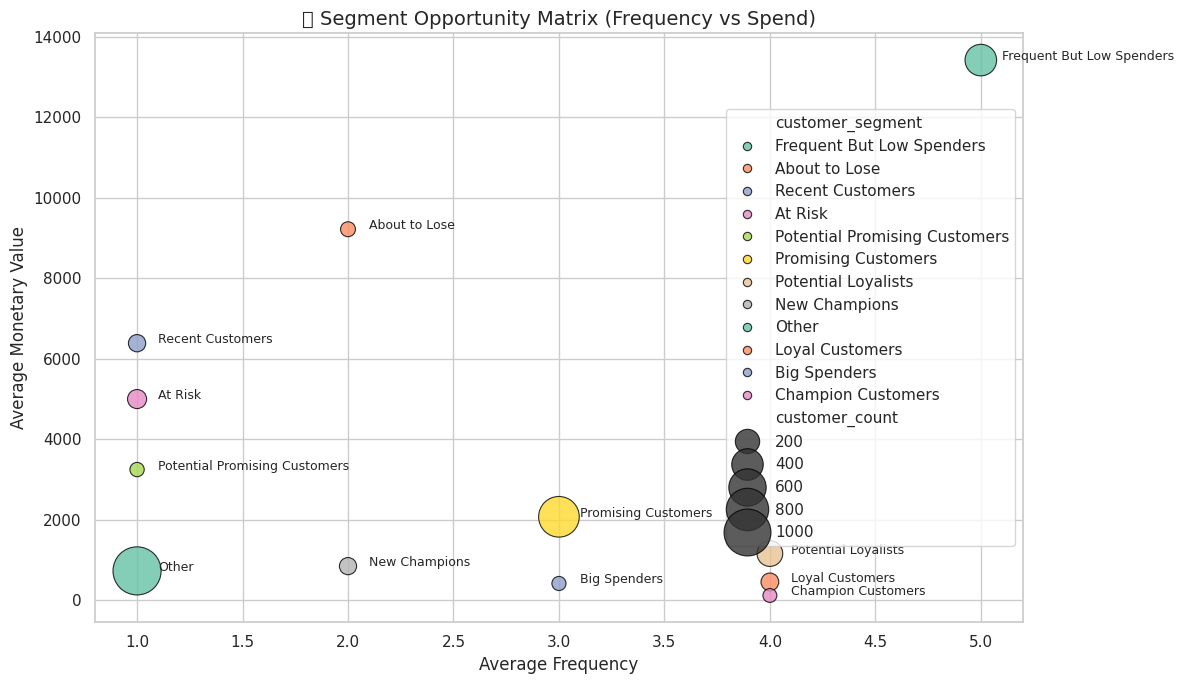

In [ ]:
# 🎯 Which segments buy frequently but spend low (up-sell opportunity)?
query = '''
SELECT customer_segment,
       ROUND(AVG(frequency_value)) AS avg_frequency,
       ROUND(AVG(monetary_value)) AS avg_monetary,
       COUNT(*) AS customer_count
FROM rfm_analysis
GROUP BY customer_segment
ORDER BY avg_monetary DESC
'''
df_seg_fm = pd.read_sql(query, engine)

# 📈 Heatmap-like bubble chart
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_seg_fm,
                x='avg_frequency',
                y='avg_monetary',
                size='customer_count',
                hue='customer_segment',
                palette='Set2',
                sizes=(100, 1200),
                alpha=0.8,
                edgecolor='black')

# Annotate
for i in range(len(df_seg_fm)):
    plt.text(df_seg_fm.avg_frequency[i]+0.1,
             df_seg_fm.avg_monetary[i],
             df_seg_fm.customer_segment[i],
             fontsize=9)

plt.title("📊 Segment Opportunity Matrix (Frequency vs Spend)", fontsize=14)
plt.xlabel("Average Frequency")
plt.ylabel("Average Monetary Value")
plt.tight_layout()
plt.show()


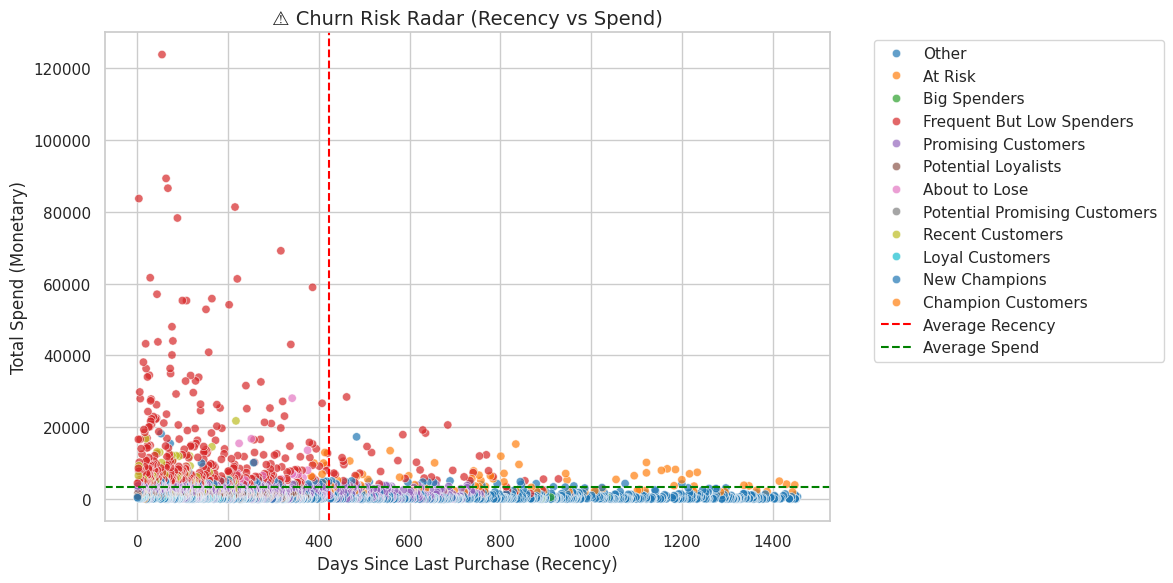

In [ ]:
# 🔎 Identify high-spenders who haven’t bought in a while
query = '''
SELECT customer_segment, recency_value, monetary_value
FROM rfm_analysis
'''
df_rec_mon = pd.read_sql(query, engine)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_rec_mon,
                x='recency_value',
                y='monetary_value',
                hue='customer_segment',
                palette='tab10',
                alpha=0.7)

plt.axvline(df_rec_mon['recency_value'].mean(), color='red', linestyle='--', label='Average Recency')
plt.axhline(df_rec_mon['monetary_value'].mean(), color='green', linestyle='--', label='Average Spend')

plt.title("⚠️ Churn Risk Radar (Recency vs Spend)", fontsize=14)
plt.xlabel("Days Since Last Purchase (Recency)")
plt.ylabel("Total Spend (Monetary)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/tmp/ipython-input-11-1553209319.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_revenue, x='customer_segment', y='total_revenue', palette='YlGnBu')
/tmp/ipython-input-11-1553209319.py:16: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


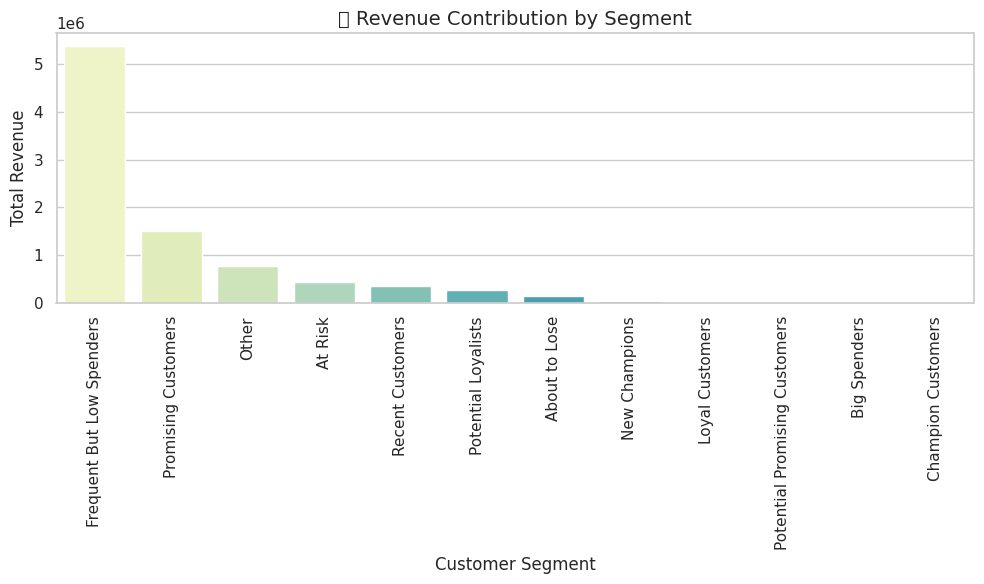

In [ ]:
# 💰 Who are the top revenue-generating segments?
query = '''
SELECT customer_segment, ROUND(SUM(monetary_value)) AS total_revenue
FROM rfm_analysis
GROUP BY customer_segment
ORDER BY total_revenue DESC
'''
df_revenue = pd.read_sql(query, engine)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_revenue, x='customer_segment', y='total_revenue', palette='YlGnBu')
plt.title('🏆 Revenue Contribution by Segment', fontsize=14)
plt.xlabel('Customer Segment')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
# 🧮 Estimating basic CLV: Frequency × AOV (AOV = Monetary / Frequency)
query = '''
SELECT
    "Customer ID",
    "Customer Name",
    frequency_value,
    monetary_value,
    ROUND(monetary_value::decimal / NULLIF(frequency_value, 0), 2) AS avg_order_value,
    ROUND(frequency_value * (monetary_value::decimal / NULLIF(frequency_value, 0)), 2) AS clv_estimate
FROM rfm_score_data
ORDER BY clv_estimate DESC
LIMIT 15
'''
df_clv = pd.read_sql(query, engine)
df_clv


,Customer ID,Customer Name,frequency_value,monetary_value,avg_order_value,clv_estimate
0,3075,Gordon Brandt,8,123746.0,15468.25,123746.0
1,308,Glen Caldwell,15,89270.0,5951.33,89270.0
2,2571,Rosemary O'Brien,6,86541.0,14423.50,86541.0
3,2107,Leigh Burnette Hurley,13,83652.0,6434.77,83652.0
4,553,Kristine Connolly,11,81296.0,7390.55,81296.0
5,1733,Nina Horne Kelly,4,78244.0,19561.00,78244.0
6,640,Neal Wolfe,10,69118.0,6911.80,69118.0
7,1999,Priscilla Kane,9,61611.0,6845.67,61611.0
8,2867,Dana Teague,7,61299.0,8757.00,61299.0
9,349,Kim Weiss,7,58947.0,8421.00,58947.0


/tmp/ipython-input-23-109328325.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clv_seg, x='customer_segment', y='clv_estimate', palette='coolwarm')
/tmp/ipython-input-23-109328325.py:23: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


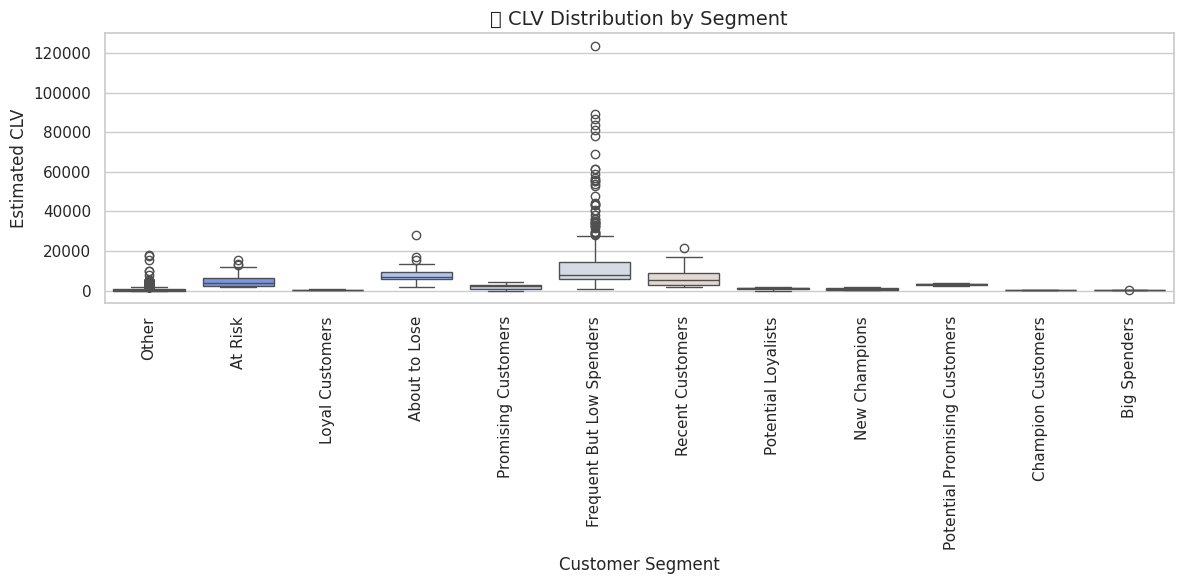

In [ ]:
# Combine CLV with Segment
query = '''
SELECT
    rsd."Customer ID",
    rsd."Customer Name",
    rsd.frequency_value,
    rsd.monetary_value,
    ROUND(rsd.monetary_value::decimal / NULLIF(rsd.frequency_value, 0), 2) AS avg_order_value,
    ROUND(rsd.frequency_value * (rsd.monetary_value::decimal / NULLIF(rsd.frequency_value, 0)), 2) AS clv_estimate,
    ra.customer_segment
FROM rfm_score_data AS rsd
JOIN rfm_analysis AS ra ON rsd."Customer ID" = ra."Customer ID"
'''
df_clv_seg = pd.read_sql(query, engine)

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clv_seg, x='customer_segment', y='clv_estimate', palette='coolwarm')
plt.title('📈 CLV Distribution by Segment', fontsize=14)
plt.xlabel('Customer Segment')
plt.ylabel('Estimated CLV')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# 🏅 Top 10 Champion Customers by Estimated CLV
query = '''
SELECT
    rfm_score_data."Customer ID",
    rfm_score_data."Customer Name",
    ROUND(rfm_score_data.frequency_value * (rfm_score_data.monetary_value::decimal / NULLIF(rfm_score_data.frequency_value, 0)), 2) AS clv_estimate
FROM rfm_score_data
JOIN rfm_analysis ON rfm_score_data."Customer ID" = rfm_analysis."Customer ID"
WHERE rfm_analysis.customer_segment = 'Champion Customers'
ORDER BY clv_estimate DESC
LIMIT 10
'''
df_top_champions = pd.read_sql(query, engine)
df_top_champions

,Customer ID,Customer Name,clv_estimate
0,1654,Bob Jiang,118.0


In [ ]:
query = '''
SELECT
    "Customer ID",
    "Customer Name",
    recency_value,
    frequency_value,
    monetary_value,
    r_score,
    f_score,
    m_score,
    total_rfm_score,
    rfm_score_combination
FROM rfm_score_data
'''
df_rfm = pd.read_sql(query, engine)
df_rfm.head()


,Customer ID,Customer Name,recency_value,frequency_value,monetary_value,r_score,f_score,m_score,total_rfm_score,rfm_score_combination
0,783,Carlos Byrd,1455,1,615.0,1,2,4,7,124
1,2165,Melanie Knight,1452,1,16.0,1,1,5,7,115
2,470,Tony Doyle,1450,1,60.0,1,1,5,7,115
3,469,Marion Bowling,1450,1,33.0,1,2,5,8,125
4,466,Marc Nash,1450,1,1133.0,1,1,3,5,113


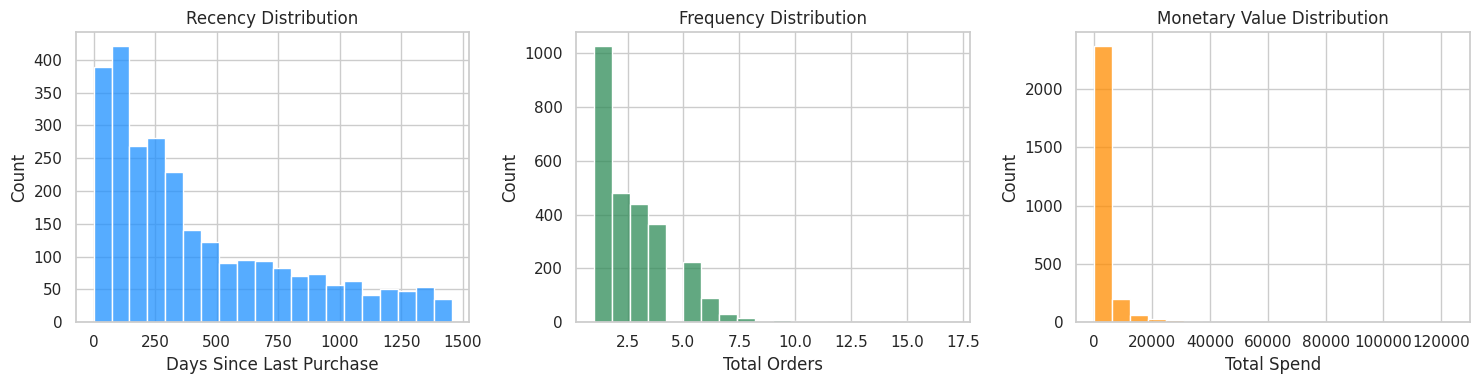

In [ ]:
# 📉 Recency Distribution
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
sns.histplot(df_rfm['recency_value'], bins=20, color='dodgerblue')
plt.title('Recency Distribution')
plt.xlabel('Days Since Last Purchase')

# 📦 Frequency Distribution
plt.subplot(1, 3, 2)
sns.histplot(df_rfm['frequency_value'], bins=20, color='seagreen')
plt.title('Frequency Distribution')
plt.xlabel('Total Orders')

# 💰 Monetary Distribution
plt.subplot(1, 3, 3)
sns.histplot(df_rfm['monetary_value'], bins=20, color='darkorange')
plt.title('Monetary Value Distribution')
plt.xlabel('Total Spend')

plt.tight_layout()
plt.show()


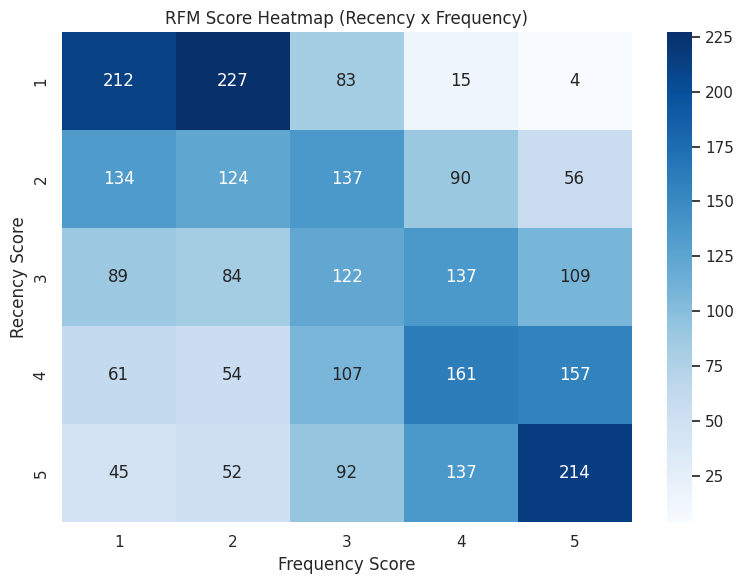

In [ ]:
# Count each RFM score combo
df_rfm['R'] = df_rfm['rfm_score_combination'].str[0].astype(int)
df_rfm['F'] = df_rfm['rfm_score_combination'].str[1].astype(int)
df_rfm['M'] = df_rfm['rfm_score_combination'].str[2].astype(int)

# Pivot table for Recency x Frequency (you can create for M too)
pivot_rf = df_rfm.pivot_table(index='R', columns='F', values='Customer ID', aggfunc='count').fillna(0)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_rf, annot=True, fmt='g', cmap='Blues')
plt.title('RFM Score Heatmap (Recency x Frequency)')
plt.xlabel('Frequency Score')
plt.ylabel('Recency Score')
plt.tight_layout()
plt.show()


In [ ]:
query = '''
SELECT customer_segment,
       COUNT(*) AS customer_count,
       ROUND(AVG(monetary_value)) AS avg_spend,
       ROUND(AVG(frequency_value)) AS avg_orders,
       ROUND(AVG(recency_value)) AS avg_recency
FROM rfm_analysis
GROUP BY customer_segment
ORDER BY customer_count DESC
'''
df_seg = pd.read_sql(query, engine)
df_seg


,customer_segment,customer_count,avg_spend,avg_orders,avg_recency
0,Other,1058,729.0,1.0,671.0
1,Promising Customers,728,2073.0,3.0,288.0
2,Frequent But Low Spenders,401,13419.0,5.0,199.0
3,Potential Loyalists,234,1159.0,4.0,183.0
4,At Risk,86,4998.0,1.0,827.0
5,Loyal Customers,62,455.0,4.0,104.0
6,Recent Customers,54,6386.0,1.0,93.0
7,New Champions,52,847.0,2.0,52.0
8,About to Lose,16,9217.0,2.0,306.0
9,Potential Promising Customers,7,3246.0,1.0,313.0


/tmp/ipython-input-30-1267369346.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_seg, x='customer_segment', y='customer_count', palette='tab20')


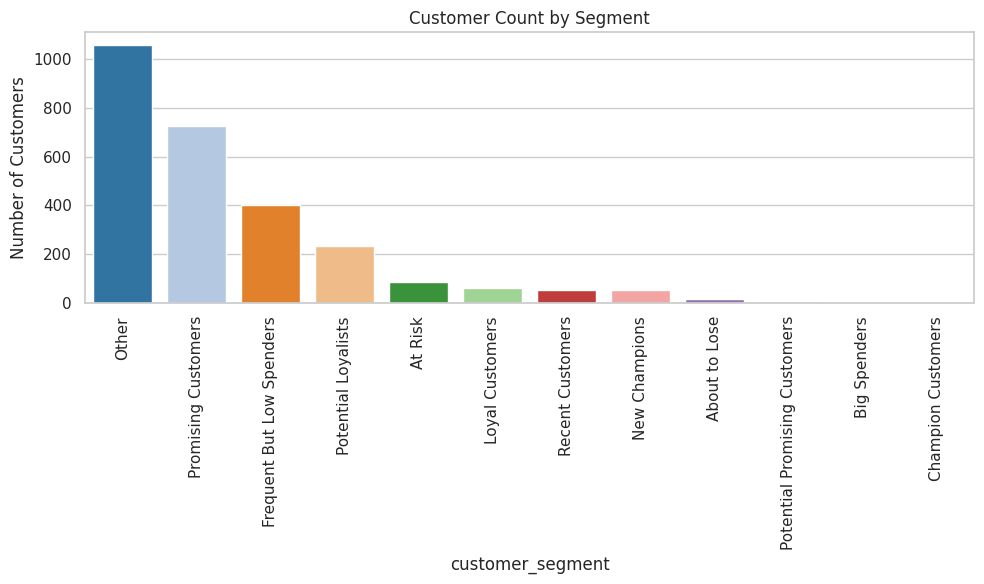

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_seg, x='customer_segment', y='customer_count', palette='tab20')
plt.title('Customer Count by Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


/tmp/ipython-input-32-687748065.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_seg, x='customer_segment', y='avg_spend', palette='rocket')


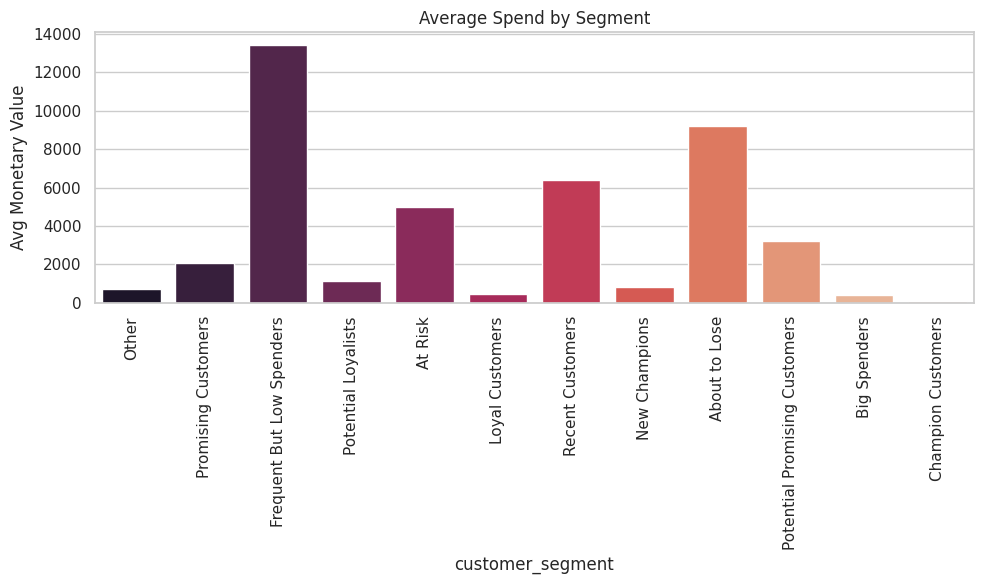

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_seg, x='customer_segment', y='avg_spend', palette='rocket')
plt.title('Average Spend by Segment')
plt.ylabel('Avg Monetary Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


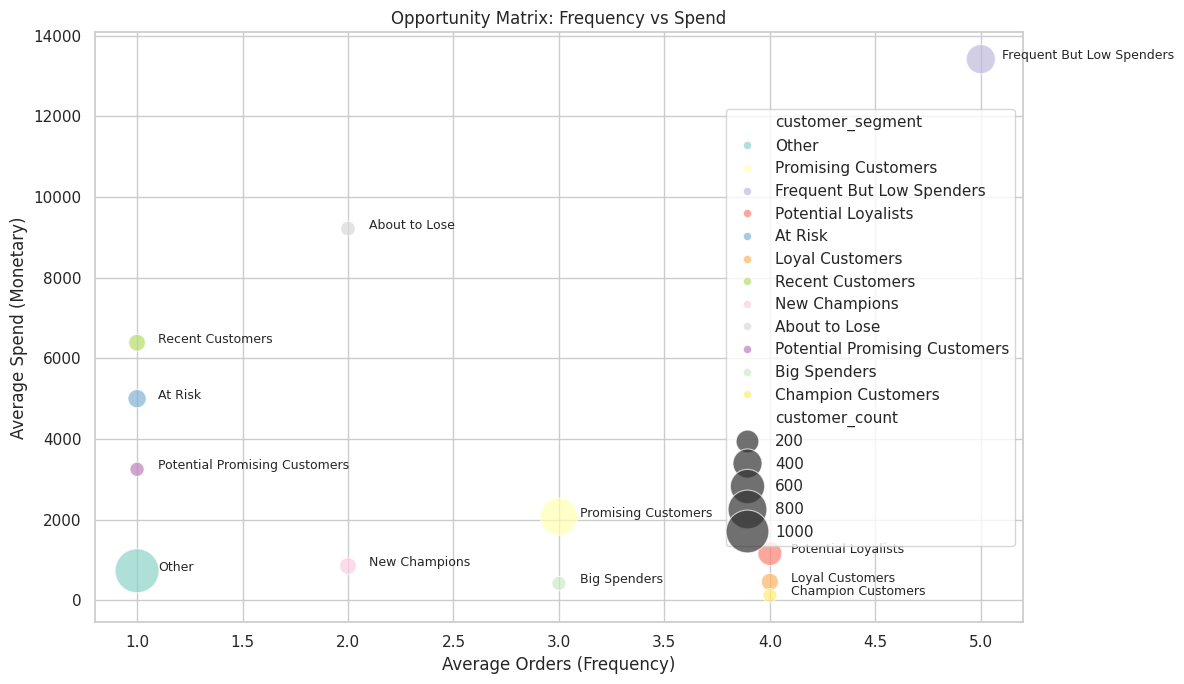

In [ ]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_seg, x='avg_orders', y='avg_spend', size='customer_count',
                hue='customer_segment', sizes=(100, 1000), palette='Set3', alpha=0.7)

for i in range(len(df_seg)):
    plt.text(df_seg.avg_orders[i]+0.1, df_seg.avg_spend[i], df_seg.customer_segment[i], fontsize=9)

plt.title("Opportunity Matrix: Frequency vs Spend")
plt.xlabel("Average Orders (Frequency)")
plt.ylabel("Average Spend (Monetary)")
plt.tight_layout()
plt.show()


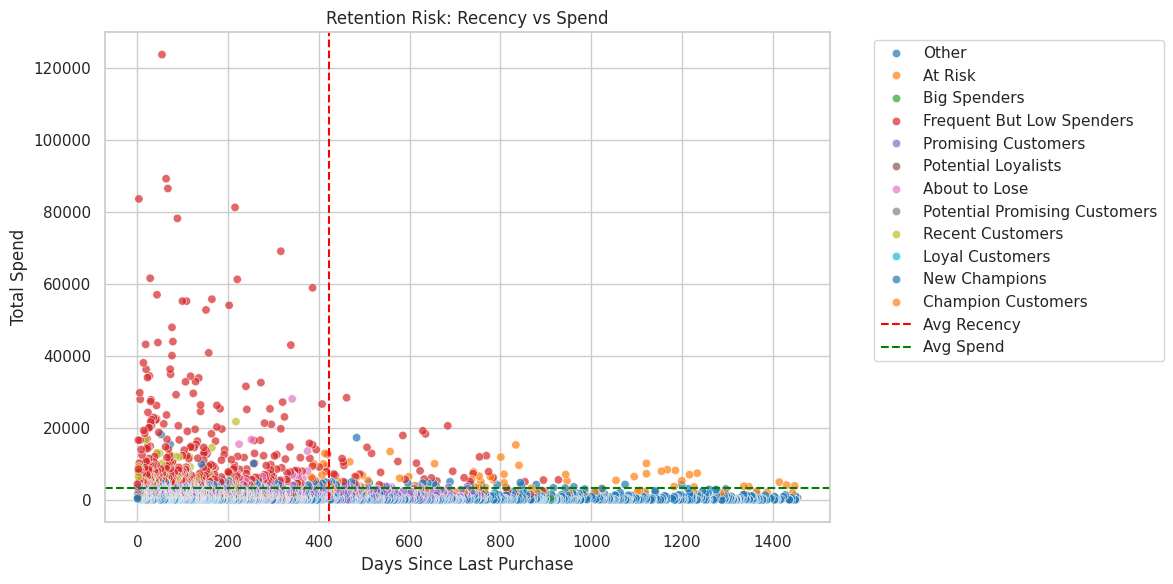

In [ ]:
query = '''
SELECT customer_segment, recency_value, monetary_value
FROM rfm_analysis
'''
df_rec_m = pd.read_sql(query, engine)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_rec_m, x='recency_value', y='monetary_value', hue='customer_segment', palette='tab10', alpha=0.7)

plt.axvline(df_rec_m['recency_value'].mean(), linestyle='--', color='red', label='Avg Recency')
plt.axhline(df_rec_m['monetary_value'].mean(), linestyle='--', color='green', label='Avg Spend')
plt.title("Retention Risk: Recency vs Spend")
plt.xlabel("Days Since Last Purchase")
plt.ylabel("Total Spend")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
